# The dataset

Download the dataset from: https://www.kaggle.com/c/dogs-vs-cats/data
When you unzip the train.zip file, you will have a folder called "train/" which contains 25,000 .jpg files of dogs and cats. The photos are labeled by their filename, with the word "dog" or "cat".
The following script will create a new folder "dogs_vs_cats" with two subfolders: "train" and "test".
In both folders "train" and "test" we create subfolders "cats" and "dogs". Now all available photos are copied to the appropriate subdirectory. A part of the dataset is used for testing.

# Plot Photos

Looking at a few random photos in the directory, you can see that the photos are color and have different shapes and sizes.

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

def plot_photos(category):
    # define location of dataset
    folder = 'asl_alphabet_train/' + category + '/'
    # plot first few images
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # define filename
        filename = folder + category + str(i + 1) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        plt.imshow(image)
    # show the figure
    plt.show()

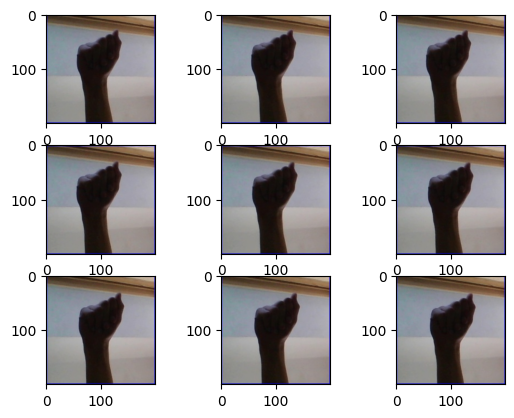

In [3]:
plot_photos('A')

# Import statements

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import warnings

warnings.filterwarnings('ignore')

Enable autocomplete (using tab).

In [2]:
%config Completer.use_jedi = False

# Load data

We are using Keras to retrieve images from the disk with the flow_from_directory method of the ImageDataGenerator class.

Image augmentation is a method of applying different kinds of transformation to original images resulting in multiple transformed copies of the same image. The images are different from each other in certain aspects because of shifting, rotating, flipping techniques. So, we are using the Keras ImageDataGenerator class to augment our images.

All images are reshaped to 64 x 64 square photos. The pixel values are scaled to the range 0-1.

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2)

In [12]:
training_set = train_datagen.flow_from_directory('asl_alphabet_train/',
                                                 target_size = (64, 64),
                                                 batch_size = 50,
                                                 class_mode = 'categorical',
                                                 subset='training')

Found 69600 images belonging to 29 classes.


In [13]:
validation_set = train_datagen.flow_from_directory('asl_alphabet_train/',
                                            target_size = (64, 64),
                                            batch_size = 50,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 17400 images belonging to 29 classes.


# Baseline CNN Model

The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model. Padding is used on the convolutional layers to ensure the height and width shapes of the output feature maps matches the inputs.
We start with a baseline model with 1 convolutional block.

In [25]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64 ,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(29, activation = 'softmax'))

# Compilation Step

In the compilation step we define the:

- the loss function
- the optimizer
- the evaluation metric

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam',
              metrics=['accuracy'])

# Network summary

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)        

In [28]:
from keras import backend as backend
backend._get_available_gpus()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16501209263947469884
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1738591438
locality {
  bus_id: 1
  links {
  }
}
incarnation: 308222302419567329
physical_device_desc: "device: 0, name: NVIDIA RTX A2000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


# Train the network

We can then fit the model using the train iterator (training_set) and use the test iterator (test_set) as a validation dataset during training.

The number of steps for the train and test iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and test directories divided by the batch size (32).

The model will be fit for 5 epochs. (This is for demo only.)

In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [34]:
history = model.fit(training_set,validation_data=validation_set, epochs=2, verbose=1)

Epoch 1/2
1392/1392 [==============================] - 103s 74ms/step - loss: 0.1515 - accuracy: 0.9489 - val_loss: 1.2645 - val_accuracy: 0.7240
Epoch 2/2
1392/1392 [==============================] - 102s 73ms/step - loss: 0.1109 - accuracy: 0.9622 - val_loss: 1.6038 - val_accuracy: 0.6886


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


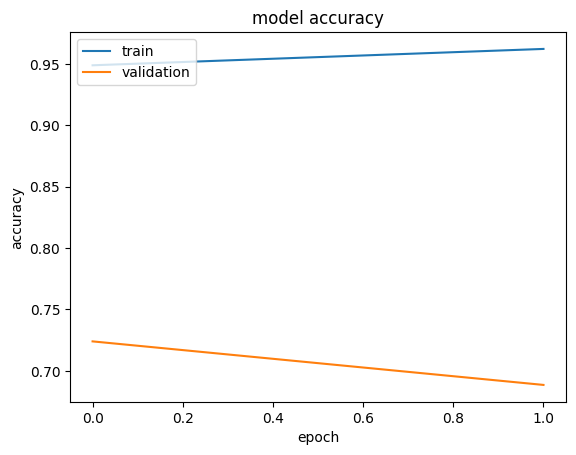

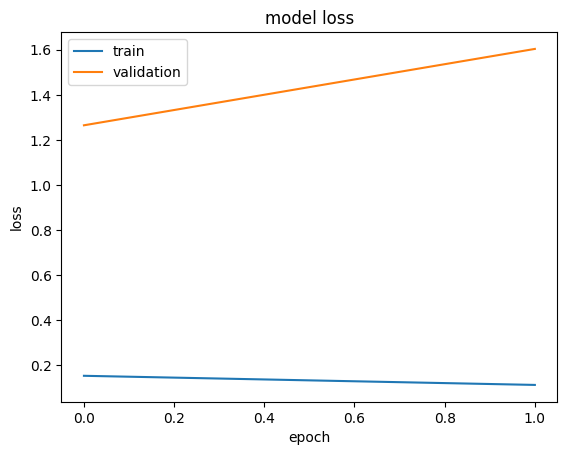

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
model.save('asl_cnn_model_1.h5')

# Test the network

Use the test set to test how well the network will perform:

In [49]:
label_map = training_set.class_indices
label_map = dict((v,k) for k,v in label_map.items())

In [56]:
np.save('asl_labels', training_set.class_indices)

In [53]:
import keras.utils as image

images = []
files = []
for img in os.listdir('asl_alphabet_test/'):
    files.append(img)
    img = os.path.join('asl_alphabet_test/', img)
    img = image.load_img(img, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
for i in range(len(files)):
    result = label_map[np.argmax(classes[i])]
    print(files[i] + ' ' + result)

3/3 [==============================] - 0s 12ms/step
A_test.jpg A
B_test.jpg B
C_test.jpg C
D_test.jpg D
E_test.jpg E
F_test.jpg F
G_test.jpg J
H_test.jpg H
I_test.jpg I
J_test.jpg J
K_test.jpg K
L_test.jpg L
M_test.jpg M
nothing_test.jpg nothing
N_test.jpg N
O_test.jpg O
P_test.jpg P
Q_test.jpg Q
R_test.jpg R
space_test.jpg space
S_test.jpg S
T_test.jpg T
U_test.jpg U
V_test.jpg V
W_test.jpg W
X_test.jpg X
Y_test.jpg Y
Z_test.jpg Z
